<a href="https://colab.research.google.com/github/IvanPP1018/SIMULACION-1/blob/main/Gamma.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

╒═══════╤══════════════════════╤═════════════════╤═══════════╤════════════════════╤════════════╤═════════╤═══════════════════════════════╕
│   Mes │   Inventario inicial │   No. aleatorio │   Demanda │   Inventario final │   Faltante │   Orden │   Inventario mensual promedio │
╞═══════╪══════════════════════╪═════════════════╪═══════════╪════════════════════╪════════════╪═════════╪═══════════════════════════════╡
│     1 │                  150 │       0.430412  │        58 │                 92 │          0 │       1 │                         121   │
├───────┼──────────────────────┼─────────────────┼───────────┼────────────────────┼────────────┼─────────┼───────────────────────────────┤
│     2 │                   92 │       0.283355  │        46 │                246 │          0 │       0 │                          69   │
├───────┼──────────────────────┼─────────────────┼───────────┼────────────────────┼────────────┼─────────┼───────────────────────────────┤
│     3 │                  

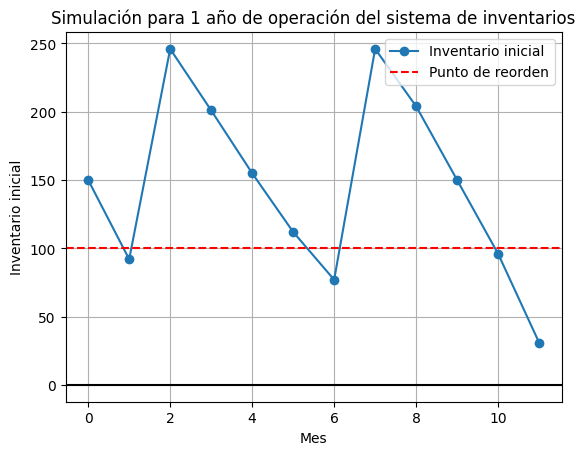

╒════════════════════╤═════════════════════════════════╤═════════════════════╤═══════════════╕
│   Costo de ordenar │   Costo de llevar el inventario │   Costo de faltante │   Costo total │
╞════════════════════╪═════════════════════════════════╪═════════════════════╪═══════════════╡
│                300 │                         2465.76 │                1800 │       4565.76 │
╘════════════════════╧═════════════════════════════════╧═════════════════════╧═══════════════╛
Valores óptimos: q = 204.0, R = 103.0
╒═══════╤══════════════════════╤═════════════════╤═══════════╤════════════════════╤════════════╤═════════╤═══════════════════════════════╕
│   Mes │   Inventario inicial │   No. aleatorio │   Demanda │   Inventario final │   Faltante │   Orden │   Inventario mensual promedio │
╞═══════╪══════════════════════╪═════════════════╪═══════════╪════════════════════╪════════════╪═════════╪═══════════════════════════════╡
│     1 │                  150 │        0.959404 │        68 │        

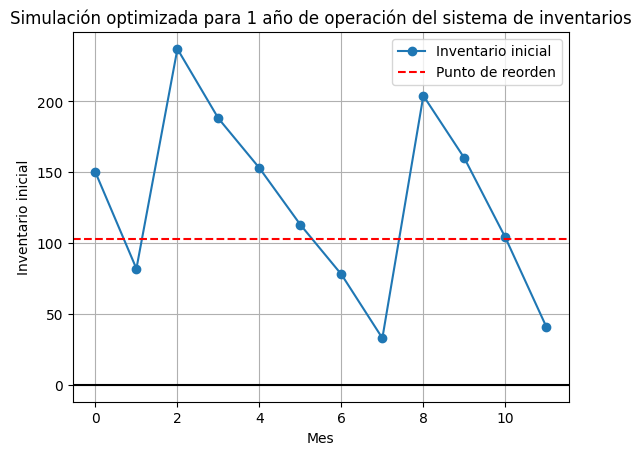

╒════════════════════╤═════════════════════════════════╤═════════════════════╤═══════════════╕
│   Costo de ordenar │   Costo de llevar el inventario │   Costo de faltante │   Costo total │
╞════════════════════╪═════════════════════════════════╪═════════════════════╪═══════════════╡
│                309 │                         2090.84 │                1850 │       4240.84 │
╘════════════════════╧═════════════════════════════════╧═════════════════════╧═══════════════╛
╒════════════════════╤═════════════════════════════════╤═════════════════════╤═══════════════╕
│   Costo de ordenar │   Costo de llevar el inventario │   Costo de faltante │   Costo total │
╞════════════════════╪═════════════════════════════════╪═════════════════════╪═══════════════╡
│                300 │                         2089.59 │                1957 │       4346.59 │
╘════════════════════╧═════════════════════════════════╧═════════════════════╧═══════════════╛


In [1]:
import random as rd
import matplotlib.pyplot as plt
import numpy as np
from tabulate import tabulate

cantidad = [35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60]
probabilidad = [0.010, 0.015, 0.020, 0.020, 0.022, 0.023, 0.025, 0.027, 0.028, 0.029, 0.035, 0.045,
                0.060, 0.065, 0.070, 0.080, 0.075, 0.070, 0.065, 0.060, 0.050, 0.040, 0.030, 0.016, 0.015, 0.005]

L_acumulada = []
acum = 0
for i in probabilidad:
    acum += i
    L_acumulada.append(acum)

def acumulada_inversa(u1=0.5):
    for i in range(len(cantidad)):
        if u1 < L_acumulada[i]:
            return cantidad[0]
        elif L_acumulada[i] <= u1 < L_acumulada[i+1]:
            return cantidad[i+1]

tiempo_entrega = [1, 2, 3]
proba_entrega = [0.3, 0.4, 0.3]

L_proba_entrega = []
acum = 0
for i in proba_entrega:
    acum += i
    L_proba_entrega.append(acum)

def proba_inversa(u2=0.5):
    for i in range(len(tiempo_entrega)):
        if u2 < L_proba_entrega[i]:
            return tiempo_entrega[0]
        elif L_proba_entrega[i] <= u2 < L_proba_entrega[i + 1]:
            return tiempo_entrega[i + 1]

def simulacion_inventario(No_de_unidades_a_ordenar, reorden):
    factor_estacionario = [1.2, 1.0, 0.9, 0.8, 0.8, 0.7, 0.8, 0.9, 1.0, 1.2, 1.3, 1.4]
    inventario_inicial = 150
    pedido_pendiente = False
    tiempo_pedido_pendiente = 0
    Total_de_ordenes = 0
    Falta_total = 0
    Total_IMP = 0
    data = []

    for i in range(12):
        aux = inventario_inicial
        No_aleatorio = rd.uniform(0, 1)
        Demanda_ajustada = int(acumulada_inversa(No_aleatorio) * factor_estacionario[i])
        inventario_final = inventario_inicial - Demanda_ajustada

        if inventario_final > 0:
            inventario_mensual_promedio = (aux + inventario_final) / 2
            Total_IMP += inventario_mensual_promedio
        else:
            inventario_mensual_promedio = round((aux / 2) * (aux / Demanda_ajustada))
            Total_IMP += inventario_mensual_promedio

        if inventario_final >= 0:
            faltante = 0
        else:
            faltante = abs(inventario_final)
            Falta_total += faltante
            inventario_final = 0

        if pedido_pendiente:
            tiempo_pedido_pendiente -= 1
            if tiempo_pedido_pendiente == 0:
                inventario_final += No_de_unidades_a_ordenar
                pedido_pendiente = False

        if inventario_final < reorden and not pedido_pendiente:
            aleator = rd.uniform(0, 1)
            tiempo_pedido_pendiente = proba_inversa(aleator)
            pedido_pendiente = True
            orden = 1
            Total_de_ordenes += 1
        else:
            orden = 0

        data.append([i + 1, aux, No_aleatorio, Demanda_ajustada, inventario_final, faltante, orden, inventario_mensual_promedio])
        inventario_inicial = inventario_final

    Costo_llevar_inventario = Total_IMP * 1.67
    Costo_faltante = Falta_total * 50
    Costo_ordenar = Total_de_ordenes * 100
    Costo_total = Costo_llevar_inventario + Costo_faltante + Costo_ordenar

    return Costo_total, data, [row[1] for row in data], Total_de_ordenes, Total_IMP, Falta_total

# Prueba inicial con valores de q y R
costo_total, data, inventario_i, Total_de_ordenes, Total_IMP, Falta_total = simulacion_inventario(200, 100)

# Imprime tabla sin optimizar
headers = ['Mes', 'Inventario inicial', 'No. aleatorio', 'Demanda', 'Inventario final', 'Faltante', 'Orden', 'Inventario mensual promedio']
print(tabulate(data, headers=headers, tablefmt="fancy_grid", showindex=False))

# Imprime gráfica sin optimizar
plt.plot(inventario_i, marker='o', label="Inventario inicial")
plt.title('Simulación para 1 año de operación del sistema de inventarios')
plt.xlabel('Mes')
plt.ylabel('Inventario inicial')
plt.axhline(100, color="red", linestyle='--', label='Punto de reorden')
plt.axhline(0, color='black')
plt.grid(True)
plt.legend()
plt.show()

costo = [Total_de_ordenes * 100, Total_IMP * 1.67, Falta_total * 50, costo_total]
print(tabulate([costo], headers=['Costo de ordenar', 'Costo de llevar el inventario', 'Costo de faltante', 'Costo total'], tablefmt="fancy_grid", showindex=False))

def hooke_jeeves(func, x0, delta=0.5, epsilon=1e-5, max_iter=100):
    n = len(x0)
    x = np.array(x0)
    xp = np.array(x0)
    xb = np.array(x0)
    for i in range(max_iter):
        for j in range(n):
            d = np.zeros(n)
            d[j] = delta
            if func(xb + d) < func(xb):
                xb = xb + d
            elif func(xb - d) < func(xb):
                xb = xb - d
        if np.linalg.norm(xb - xp) < epsilon:
            break
        xp = xb + (xb - xp)
        if func(xp) < func(xb):
            xb = xp
        x = xb
    return xb

def costo_total_wrapper(params):
    q, R = params
    return simulacion_inventario(q, R)[0]

# Valores iniciales de q y R
x0 = [200, 100]

# Optimización
q_opt, R_opt = hooke_jeeves(costo_total_wrapper, x0)

# Simulación con valores óptimos
costo_total_opt, data_opt, inventario_i_opt, Total_de_ordenes_opt, Total_IMP_opt, Falta_total_opt = simulacion_inventario(q_opt, R_opt)

# Imprime tabla optimizada
print(f"Valores óptimos: q = {q_opt}, R = {R_opt}")
print(tabulate(data_opt, headers=headers, tablefmt="fancy_grid", showindex=False))

# Imprime gráfica optimizada
plt.plot(inventario_i_opt, marker='o', label="Inventario inicial")
plt.title('Simulación optimizada para 1 año de operación del sistema de inventarios')
plt.xlabel('Mes')
plt.ylabel('Inventario inicial')
plt.axhline(R_opt, color="red", linestyle='--', label='Punto de reorden')
plt.axhline(0, color='black')
plt.grid(True)
plt.legend()
plt.show()

# Tabla de costos optimizados
costo_opt = [Total_de_ordenes_opt * R_opt, Total_IMP_opt * 1.67, Falta_total_opt * 50, costo_total_opt]
print(tabulate([costo_opt], headers=['Costo de ordenar', 'Costo de llevar el inventario', 'Costo de faltante', 'Costo total'], tablefmt="fancy_grid", showindex=False))

def simulacion(No_de_unidades_a_ordenar, reorden, n=50):
    SUM1 = SUM2 = SUM3 = SUM4 = 0
    for _ in range(n):
        Costo_total, _, _, Total_de_ordenes, Total_IMP, Falta_total = simulacion_inventario(No_de_unidades_a_ordenar, reorden)
        Costo_llevar_inventario = Total_IMP * 1.67
        Costo_faltante = Falta_total * 50
        Costo_ordenar = Total_de_ordenes * 100
        SUM1 += Costo_total
        SUM2 += Costo_llevar_inventario
        SUM3 += Costo_faltante
        SUM4 += Costo_ordenar

    Prom1 = SUM1 / n
    Prom2 = SUM2 / n
    Prom3 = SUM3 / n
    Prom4 = SUM4 / n
    return Prom1, Prom2, Prom3, Prom4

prom1, prom2, prom3, prom4 = simulacion(q_opt, R_opt)
print(tabulate([[prom4, prom2, prom3, prom1]], headers=['Costo de ordenar', 'Costo de llevar el inventario', 'Costo de faltante', 'Costo total'], tablefmt="fancy_grid", showindex=False))
